##Runup and Reverse Shoaling Calculations

###  Reverse Shoaling
Reverse shoaling is used to estimate deepwater wave height Ho from wave heights measured at intermediate depths equal to, or deeper than, the breaking depth hb.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
g = 9.81
pi = np.pi

In [10]:
def qkhfs( w, h ):
    """
    Quick iterative calculation of kh in gravity-wave dispersion relationship
    kh = qkhfs(w, h )
    
    Input
        w - array of angular wave frequencies = 2*pi/T where T = wave period [1/s]
        h - array of water depths [m]
    Returns
        kh - [len(wa), len(ha)] array of wavenumber * depth [ ]

    Orbital velocities from kh are accurate to 3e-12 !

    RL Soulsby (2006) \"Simplified calculation of wave orbital velocities\"
    HR Wallingford Report TR 155, February 2006
    Eqns. 12a - 14
    """
    tanh = np.tanh
    g = 9.81
    x = w**2.0 *h/g
    y = np.sqrt(x) * (x<1.) + x *(x>=1.)
    # is this faster than a loop?
    t = tanh( y )
    y = y-( (y*t -x)/(t+y*(1.0-t**2.0)))
    t = tanh( y )
    y = y-( (y*t -x)/(t+y*(1.0-t**2.0)))
    t = tanh( y )
    y = y-( (y*t -x)/(t+y*(1.0-t**2.0)))
    kh = y
    return kh

In [11]:
T = 10. # wave period (s)
H = 1.54
h = 8.
Bf=.08 # beach steepness in foreshore ()
gam = 0.78 # Ratio height to depth at breaking Hb/hb. Could 0.78.

# Case 1 - Measured at break height
Hb = H
hb = Hb/gam
w = 2.*pi/T
Lo = g*T*T/(2.*pi)
ko = 2*pi/Lo
kh = qkhfs( w, hb )
Ks = 1./ np.sqrt( np.tanh(kh)*(1.+2.*kh/np.sinh(2.*kh)) )
Ksn = (4.*ko*h)**(-1./4.) * (1.+0.25*ko*h+(13./228.)*(ko*h)**2.)
Ksb = (4.*ko*h)**(-1./4.) * (1.+0.25*ko*h+(13./228.)*(ko*h)**2.)*(1.+(3./8.)*(H/Lo)**1.5*(ko*h)**(-3.))

In [12]:
Ho = Hb/Ks # deepwater wave height (m)
Lo = g*T*T/(2.*pi)
I = Bf*(np.sqrt(Lo/Ho))
print 'Deepwater wave height Ho = ',Ho,' m'
print 'Break height Hb = ',Hb,' m'
print 'Break depth hb = ',hb,' m'
print 'Shoaling coefficient Ks = ',Ks,' ()'
print 'Approximate explicit shoaling coefficient Ks = ',Ksn,' ()'
print '...with breaker correction Ksb = ',Ksb,' ()'
print 'Deepwater wavelength Lo = ',Lo,' m'
print 'Irribarren number = ',I
eta = 0.35*Bf*np.sqrt(Ho*Lo)
Sinc = 0.75*Bf*np.sqrt(Ho*Lo)
SIG = 0.06*np.sqrt(Ho*Lo)
R2 = 1.1*(eta+0.5*np.sqrt(Sinc**2+SIG**2)) #Eqns 6 and 7
print "R2, eta, Sinc, SIG: ",R2,eta,Sinc,SIG
if(I<0.3):
    R2L = 0.043*np.sqrt(Ho*Lo)
    print "Dissipative R2: ",R2L
Bang = np.arctan(Bf)
x = R2/np.sin(Bang)
print "Beach angle, runup distance x: {0}, {1}",Bang*180./pi, x

Deepwater wave height Ho =  1.13344767624  m
Break height Hb =  1.54  m
Break depth hb =  1.97435897436  m
Shoaling coefficient Ks =  1.35868645045  ()
Approximate explicit shoaling coefficient Ks =  1.01983030633  ()
...with breaker correction Ksb =  1.03105732398  ()
Deepwater wavelength Lo =  156.130999173  m
Irribarren number =  0.938931303123
R2, eta, Sinc, SIG:  1.03056057542 0.372480326287 0.798172127757 0.798172127757
Beach angle, runup distance x: {0}, {1} 4.5739212599 12.92316387


In [13]:
# Case 2 - Measured in deep water
Ho = H
Lo = g*T*T/(2.*pi)
ko = 2*pi/Lo
Hb = 0.39*pow(g,(1./5.))*pow( T*Ho*Ho, (2./5.) ) # Komar 6.6
hb = Hb/gam
kh = qkhfs( w, hb )
Ks = 1./ np.sqrt( np.tanh(kh)*(1.+2.*kh/np.sinh(2.*kh)) )
Ksn = (4.*ko*h)**(-1./4.) * (1.+0.25*ko*h+(13./228.)*(ko*h)**2.)
Ksb = (4.*ko*h)**(-1./4.) * (1.+0.25*ko*h+(13./228.)*(ko*h)**2.)*(1.+(3./8.)*(Ho/Lo)**1.5*(ko*h)**(-3.))

I = Bf*(np.sqrt(Lo/Ho))
print 'Deepwater wave height Ho = ',Ho,' m'
print 'Break height Hb = ',Hb,' m'
print 'Break depth hb = ',hb,' m'
print 'Shoaling coefficient Ks = ',Ks,' ()'
print 'Approximate explicit shoaling coefficient Ks = ',Ksn,' ()'
print '...with breaker correction Ksb = ',Ksb,' ()'
print 'Deepwater wavelength Lo = ',Lo,' m'
print 'Irribarren number = ',I
eta = 0.35*Bf*np.sqrt(Ho*Lo)
Sinc = 0.75*Bf*np.sqrt(Ho*Lo)
SIG = 0.06*np.sqrt(Ho*Lo)
R2 = 1.1*(eta+0.5*np.sqrt(Sinc**2+SIG**2)) #Eqns 6 and 7
print "R2, eta, Sinc, SIG: ",R2,eta,Sinc,SIG
if(I<0.3):
    R2L = 0.043*np.sqrt(Ho*Lo)
    print "Dissipative R2: ",R2L
Bang = np.arctan(Bf)
x = R2/np.sin(Bang)
print "Beach angle, runup distance x: ",Bang*180./pi, x

Deepwater wave height Ho =  1.54  m
Break height Hb =  2.18481659147  m
Break depth hb =  2.80104691214  m
Shoaling coefficient Ks =  1.25543413867  ()
Approximate explicit shoaling coefficient Ks =  1.01983030633  ()
...with breaker correction Ksb =  1.03105732398  ()
Deepwater wavelength Lo =  156.130999173  m
Irribarren number =  0.80551604606
R2, eta, Sinc, SIG:  1.20124929696 0.434173148826 0.930371033199 0.930371033199
Beach angle, runup distance x:  4.5739212599 15.063589549


(50L,) (50L,) (50L,)


(0.9, 2.2)

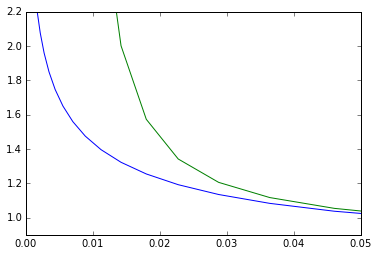

In [14]:
h = np.logspace(-2, 3., 50)
w = 2.*pi/T
ko = 2*pi/Lo
wa = np.array([w])
kh = np.squeeze(qkhfs( wa, h ))
Cgo = 0.5*g*T/(2*pi)
n = 0.5+kh/np.sinh(2.*kh)
Cg = n*g*T/(2.*pi)
Ks = 1./ np.sqrt( np.tanh(kh)*(1.+2*kh/np.sinh(2*kh)) )
Ksb = (4.*ko*h)**(-1./4.) * (1.+0.25*ko*h+(13./228.)*(ko*h)**2.)*(1.+(3./8.)*(Ho/Lo)**1.5*(ko*h)**(-3.))
print np.shape(h), np.shape(Ks), np.shape(Ksb)
plt.plot(h/Lo,Ks)
plt.plot(h/Lo,Ksb)
plt.xlim((0.,.05))
plt.ylim((.9,2.2))

In [15]:
eta = 0.35*Bf*np.sqrt(Ho*Lo)
Sinc = 0.75*Bf*np.sqrt(Ho*Lo)
SIG = 0.06*np.sqrt(Ho*Lo)
R2 = 1.1*(eta*0.5*np.sqrt(Sinc**2+SIG**2)) #Eqns 6 and 7